In [1]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("play_tennis.csv")

# Display dataset
print(df)

# -----------------------------
# 2. Separate Features & Target
# -----------------------------
X = df.iloc[:, :-1]   # all columns except 'play'
y = df.iloc[:, -1]    # 'play' column

# -----------------------------
# 3. Prior Probabilities
# -----------------------------
total = len(df)

p_yes = len(df[df['play'] == 'Yes']) / total
p_no  = len(df[df['play'] == 'No']) / total

print("\nPrior Probabilities:")
print("P(Yes) =", p_yes)
print("P(No)  =", p_no)

# -----------------------------
# 4. Conditional Probabilities
# -----------------------------
def conditional_probability(feature, value, label):
    return len(df[(df[feature] == value) & (df['play'] == label)]) / len(df[df['play'] == label])

# Given input
test = {
    'outlook': 'Sunny',
    'temp': 'Hot',
    'humidity': 'High',
    'wind': 'Weak'
}

# -----------------------------
# 5. Posterior Probability
# -----------------------------
P_yes = p_yes
P_no = p_no

for feature, value in test.items():
    P_yes *= conditional_probability(feature, value, 'Yes')
    P_no  *= conditional_probability(feature, value, 'No')

print("\nPosterior Probabilities:")
print("P(Yes | Sunny, Hot, High, Weak) =", P_yes)
print("P(No  | Sunny, Hot, High, Weak) =", P_no)

# -----------------------------
# 6. Final Prediction
# -----------------------------
if P_yes > P_no:
    print("\nPrediction: Play")
else:
    print("\nPrediction: Not Play")


    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No

Prior Probabilities:
P(Yes) = 0.6428571428571429
P(No)  = 0.35714285714285715

Posterior Probabilities:
P(Yes | Sunny, Hot, High, Weak) = 0.007054673721340388
P(No  | Sunny, Hot, High, Weak) = 0.02742857142857143

Prediction: Not Play


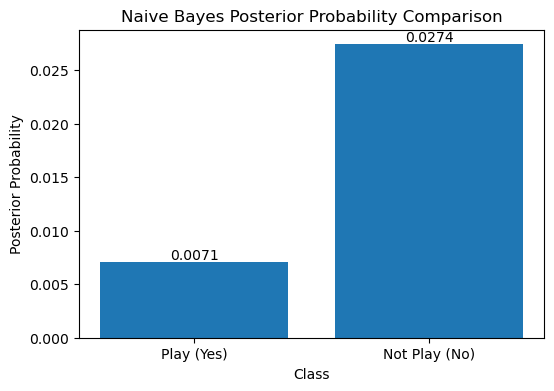

In [7]:
import matplotlib.pyplot as plt

# Use the already calculated posterior probabilities
labels = ['Play (Yes)', 'Not Play (No)']
probabilities = [P_yes, P_no]

plt.figure(figsize=(6, 4))
plt.bar(labels, probabilities)
plt.xlabel("Class")
plt.ylabel("Posterior Probability")
plt.title("Naive Bayes Posterior Probability Comparison")

# Show probability values on bars
for i, value in enumerate(probabilities):
    plt.text(i, value, f"{value:.4f}", ha='center', va='bottom')

plt.show()
